## Análise dos dados: café e código

A presente análise investiga o conjunto de dados públicos disponiblizado através da plataforma Kaggle (www.kaggle.com). Os  dados escolhido trazem como contexto o consumo de café no cotidiano de pessoas que trabalham na área de TI. 

### O conjunto de dados apresenta 9 colunas:

1. CodingHours: horas codificando;
2. CoffeeCupsPerDay: xícaras de cafés por dia;
3. CoffeeTime: se o consumo de café se dá antes, durante ou depois de codar;
4. CodingWithoutCoffee: se coda sem café;
5. CoffeeType: o tipo de café que é consumido;
6. CoffeeSolveBugs: se o consumo de café ajuda na solução de bugs;
7. Gender: gênero; 
8. Country: país;
9. AgeRange: faixa etária.

Referência: https://www.kaggle.com/datasets/shrutikunapuli/coffee-and-code-dataset


### De perto e de dentro: observando os dados

In [1]:
#Importando as bibliotecas: Pandas e Matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Usando a função "read_csv" para ler o arquivo, as 5 primeiras e 5 últimas linhas. 
df = pd.read_csv("CoffeeAndCode.csv")
df

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29
...,...,...,...,...,...,...,...,...,...
95,6,2,Before coding,Yes,Nescafe,Yes,Male,Lebanon,18 to 29
96,4,1,Before coding,Sometimes,Nescafe,Sometimes,Female,Lebanon,18 to 29
97,10,3,Before coding,Yes,Cappuccino,Yes,Male,Lebanon,Under 18
98,2,2,While coding,Sometimes,Espresso (Short Black),Sometimes,Female,Lebanon,18 to 29


In [3]:
#Verificando os tipos de dados:
df.dtypes

CodingHours             int64
CoffeeCupsPerDay        int64
CoffeeTime             object
CodingWithoutCoffee    object
CoffeeType             object
CoffeeSolveBugs        object
Gender                 object
Country                object
AgeRange               object
dtype: object

In [4]:
#Verificando o resumo estatístico dos dados:
df.describe()

,CodingHours,CoffeeCupsPerDay
count,100.000000,100.000000
mean,6.410000,2.890000
std,2.644205,1.613673
min,1.000000,1.000000
25%,4.000000,2.000000
50%,7.000000,2.500000
75%,8.000000,4.000000
max,10.000000,8.000000


In [5]:
#Verificando valores nulos no dataset:
print("Valores nulos por coluna do dataframe:")
print(df.isnull().sum())

Valores nulos por coluna do dataframe:
CodingHours            0
CoffeeCupsPerDay       0
CoffeeTime             0
CodingWithoutCoffee    0
CoffeeType             1
CoffeeSolveBugs        0
Gender                 0
Country                0
AgeRange               2
dtype: int64


In [6]:
#Removendo entradas (linhas) contendo valores nulos em colunas específicas:
df = df.dropna(subset=['CoffeeType', 'AgeRange'])
df.shape

(97, 9)

In [7]:
#Filtrando informações, nesse caso verifico a faixa etária contendo apenas os valore de 18 to 29 da coluna AgeRange:
df_filtrado = df[df['AgeRange'].str.contains('18 to 29')]
df_filtrado.shape

(59, 9)

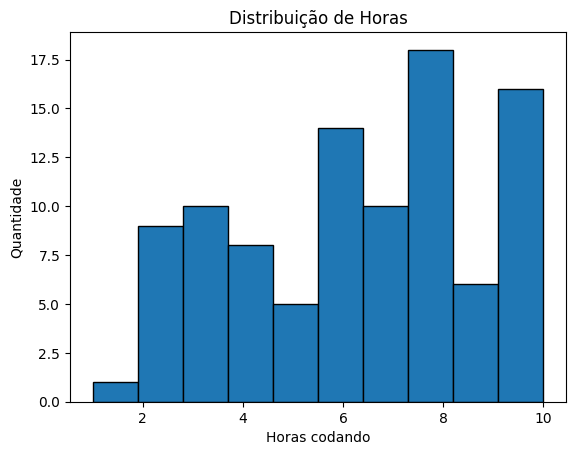

In [8]:
#Utilizando gráfico para verificar a distribuição de horas 
df['CodingHours'].plot.hist(bins=10,edgecolor='black')

plt.xlabel('Horas codando')
plt.ylabel('Quantidade')
plt.title('Distribuição de Horas')

plt.show()

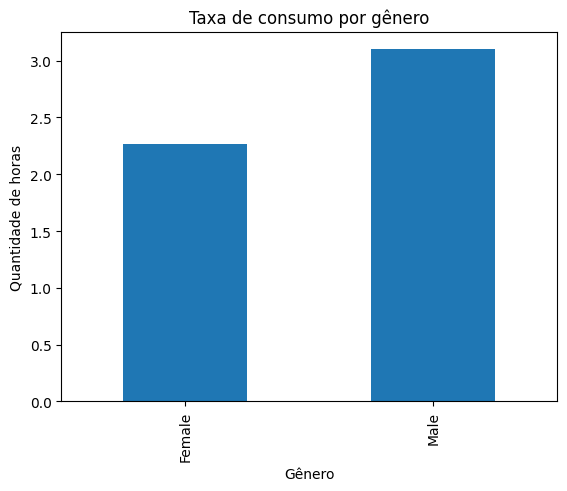

In [9]:
#Qual é o gênero que mais consome café enquanto coda, segundo os dados: 
taxa_gender = df.groupby('Gender')['CoffeeCupsPerDay'].mean()
taxa_gender.plot.bar()

plt.xlabel('Gênero')
plt.ylabel('Quantidade de horas')
plt.title('Taxa de consumo por gênero')
plt.show()

In [10]:
#Criando uma função para verificar o tipo de café mais consumido:
tipo_cafe = df['CoffeeType'].value_counts()
tipo_cafe

CoffeeType
Nescafe                     30
American Coffee             23
Turkish                     19
Espresso (Short Black)       8
Cappuccino                   7
Caffè latte                  5
Double Espresso (Doppio)     3
Americano                    2
Name: count, dtype: int64

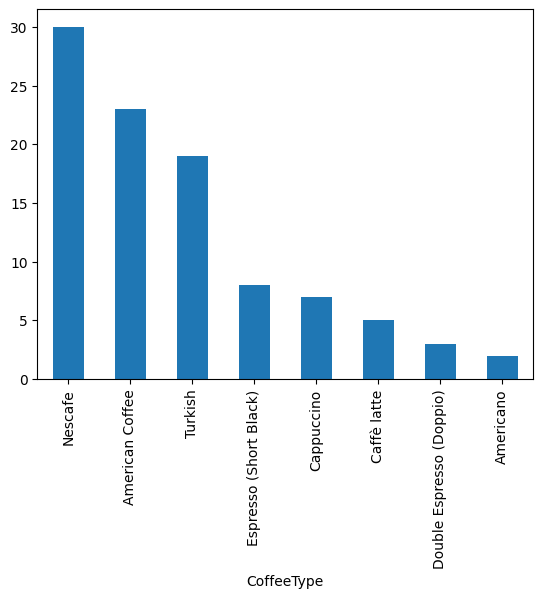

In [11]:
#Criando o gráfico segundo os dados anteriores
tipo_cafe.plot(kind='bar');

In [12]:
#Usando a mesma função anterior "value_counts" para verificar a quantidade de copos consumidos por dia:
quant_copos = df['CoffeeCupsPerDay'].value_counts()
quant_copos

CoffeeCupsPerDay
2    32
3    23
1    16
4    15
5     3
6     3
7     3
8     2
Name: count, dtype: int64

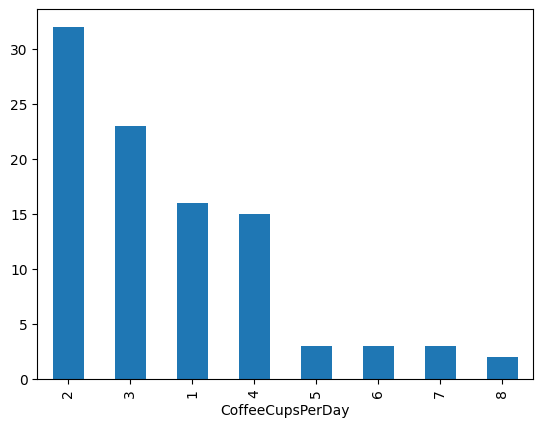

In [13]:
quant_copos.plot(kind='bar');

### Algumas conclusões:

- As pessoas que fazem parte desse conjunto de dados geralmente codam em média 8 horas por dia; 
- Segundo o conjunto de dados, homens consomem mais café enquanto codam;
- O tipo de café mais consumido é o Nescafé;
- E em média são 2 copos por dia.

